In [3]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


NameError: name 'require' is not defined

In [4]:
%%R
require(ISLR)
alpha <- function(x, y){
    vx <- var(x)
    vy <- var(y)
    cxy <- cov(x, y)
    (vy-cxy)/(vx+vy-2*cxy)
}
alpha(Portfolio$X, Portfolio$Y)

Loading required package: ISLR
[1] 0.5758321


In [5]:
%%R
alpha.fn <- function(data, index){
    with(data[index, ], alpha(X, Y))
}

In [7]:
%%R
alpha.fn(Portfolio, 1:100)

[1] 0.5758321


In [9]:
%%R
set.seed(1)
alpha.fn(Portfolio, sample(1:100, 100, replace=TRUE))

[1] 0.5963833


In [11]:
%%R
require(boot)
boot.out <- boot(Portfolio, alpha.fn, R=1000)
boot.out

Loading required package: boot

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826


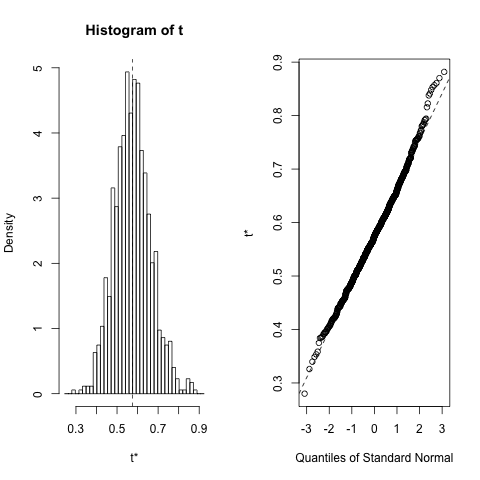

In [12]:
%%R
plot(boot.out)